<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-Bibliotecas" data-toc-modified-id="Importando-Bibliotecas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando Bibliotecas</a></span></li><li><span><a href="#Lendo-e-Analisando-Base" data-toc-modified-id="Lendo-e-Analisando-Base-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lendo e Analisando Base</a></span></li><li><span><a href="#Análise-Gráfica" data-toc-modified-id="Análise-Gráfica-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Análise Gráfica</a></span></li><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Prep</a></span></li><li><span><a href="#Treinando-um-Modelo" data-toc-modified-id="Treinando-um-Modelo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Treinando um Modelo</a></span><ul class="toc-item"><li><span><a href="#Métricas-de-Avaliação" data-toc-modified-id="Métricas-de-Avaliação-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Métricas de Avaliação</a></span><ul class="toc-item"><li><span><a href="#Matriz-de-Confusão" data-toc-modified-id="Matriz-de-Confusão-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Matriz de Confusão</a></span></li><li><span><a href="#Acurácia" data-toc-modified-id="Acurácia-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Acurácia</a></span></li><li><span><a href="#Precision" data-toc-modified-id="Precision-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Precision</a></span></li><li><span><a href="#Recall" data-toc-modified-id="Recall-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Recall</a></span></li><li><span><a href="#F1-Score" data-toc-modified-id="F1-Score-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>F1-Score</a></span></li></ul></li></ul></li></ul></div>

Este notebook tem por objetivo alocar o desenvolvimento de análise de dados envolvendo campanhas de marketing de uma instituição financeira portuguesa. Possuindo referência no renomado repositório de dados de Machine Laerning [UCI](https://archive.ics.uci.edu/ml/index.php), o conjunto [Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) tem origem em um estudo realizado em 2014, onde ações de marketing baseadas principalmente em ligações telefônicas, foram aplicadas a um banco português, gerando assim uma base com 20 atributos relacionados ao tema, além de uma variável resposta indicando se o cliente submeteu (`yes`) ou não (`no`) a um depósito a prazo.

# Importando Bibliotecas

In [1]:
# bibliotecas do projeto
import pandas as pd

# Lendo e Analisando Base

In [2]:
# Lendo base de dados
path = '../data/bank.csv'
df = pd.read_csv(path, sep=',')

print(f'Volumetria: {df.shape}')
df.head()

Volumetria: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Como mencionado anteriormente, temos 20 atributos e uma variável resposta no conjunto de dados. Pela análise das dimensões do dataset, é possível também pontuar que estamos falando de um conjunto com 41.188 amostras. Para auxiliar no entendimento do contexto do problema de negócio, vamos registrar uma breve descrição de cada uma das variáveis. A fonte das explicações a seguir é a mesma encontrada no [repositório UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) onde este dataset está armazenado.

* **age:** idade do cliente contatado pela instituição financeira _(numérica)_;
* **job:** ocupação empregatícia do cliente _(categórica)_;
* **marital:** estado civil do cliente contatado _(categórica)_;
* **education:** nível de escolaridade do cliente _(categórica)_;
* **default:** cliente possui crédito por padrão? _(categórica)_;
* **housing:** cliente possui imóveis alugados? _(categórica)_;
* **loan:** cliente poissui empréstimo pessoal? _(categórica)_;
* **contact:**  tipo de comunicação utilizada no contato _(categórica)_;
* **month:** mês do último contato _(categórica)_;
* **duration:** duração, em segundos, do último contato. Nota: esse atributo possui grande influência na variável resposta (duração=0, y='no') e seu valor é conhecido somente após a realização do contato. Dessa forma, esta só deve ser incluída nas análises para fins de benchmark, sendo desejável sua exclusão se a abordagem for a criação de um modelo preditivo _(numérica)_;
* **campaign:** quantidade de contatos realizados durante a campanha para o cliente em questão _(numérica)_;
* **pdays:** número de dias após o último contato ao cliente (999 indica que o cliente não foi contatado anteriormente) _(numérica)_;
* **previous:** quantidade de contatos realizados antes da campanha atual para o cliente em questão _(numérica)_;
* **poutcome:** resultado da última campanha de marketing _(categórica)_;

_Variáveis adicionais encontradas somente no dataset bank-adittional do repositório UCI_
* **emp_var_rate:** taxa de variação empregatícia (indicador trimestral) _(numérica)_;
* **cons_price_idx:** índice de preços ao consumidos (indicador mensal) _(numérica)_;
* **cons_conf_idx:** índice de confiança do consumidor (indicador mensal) _(numérica)_;
* **euribor3m:** taxa Euribor 3 meses (indicador diário - mercado monetário da zona do Euro) _(numérica)_;
* **nr_employed:** número de empregados da instituição _(numérica)_;

Nos próximos blocos de código, vamos utilizar métodos específicos do pandas para explorar ainda mais nosso conjunto de dados, analisando dados estatísticos e verificando algumas possíveis inconsistências que se fazem comuns na prática.

____

Método **describe**: análise estatística sobre o DataFrame
* [documentacao](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
* [geeks_for_geeks](https://www.geeksforgeeks.org/python-pandas-dataframe-info/)
* [w3_school](https://www.w3resource.com/python-exercises/pandas/python-pandas-data-frame-exercise-3.php)

In [3]:
# Analisando estatísticas
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


___

Método **info**: informações detalhadas do DataFrame

* [documentacao](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
* [geeks_for_geeks](https://www.geeksforgeeks.org/python-pandas-dataframe-info/)
* [w3_schools](https://www.w3resource.com/pandas/dataframe/dataframe-info.php)

In [4]:
# Informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


___

Atributo **dtype**: analisando os tipos primitivos do DataFrame
* [documentacao](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)
* [geeks_for_geeks](https://www.geeksforgeeks.org/python-pandas-dataframe-dtypes/)
* [w3school](https://www.w3resource.com/pandas/dataframe/dataframe-dtypes.php)
* [pbpython](https://pbpython.com/pandas_dtypes.html)

In [5]:
# Analisando
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

___

Método **isnull()**: contabilizando dados nulos no DataFrame

* [documentacao](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)
* [geeks_for_geeks](https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/)

In [6]:
# Aplicação
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Análise Gráfica

In [7]:
# Importando bibliotecas gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

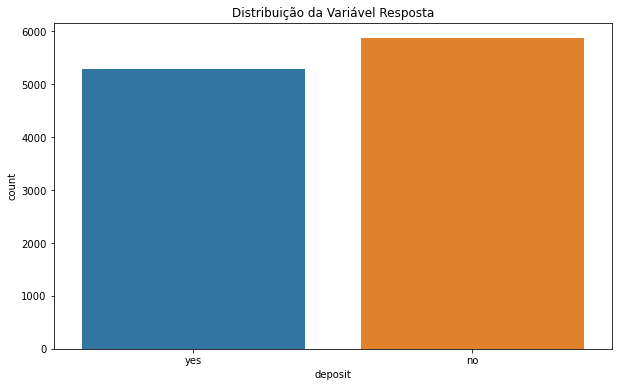

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='deposit', data=df)
ax.set_title('Distribuição da Variável Resposta')
plt.show()

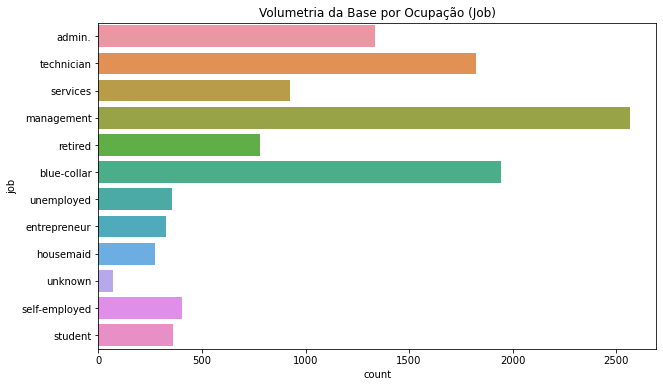

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y='job', data=df)
ax.set_title('Volumetria da Base por Ocupação (Job)')
plt.show()

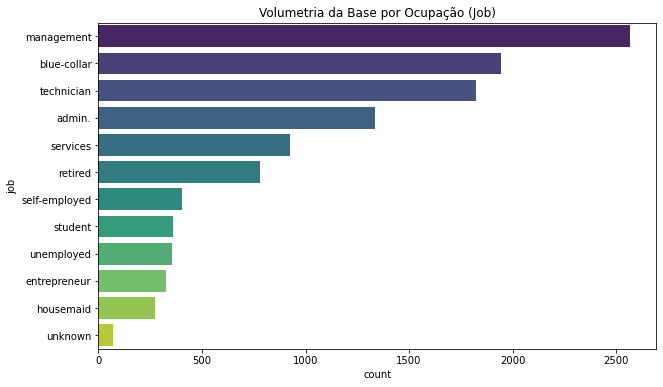

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='viridis')
ax.set_title('Volumetria da Base por Ocupação (Job)')
plt.show()

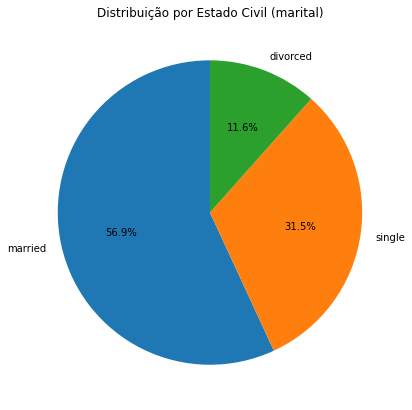

In [11]:
fig, ax = plt.subplots(figsize=(7, 7))
sizes = df['marital'].value_counts().values
labels = df['marital'].value_counts().index
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribuição por Estado Civil (marital)')
plt.show()

_Referências:_

https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

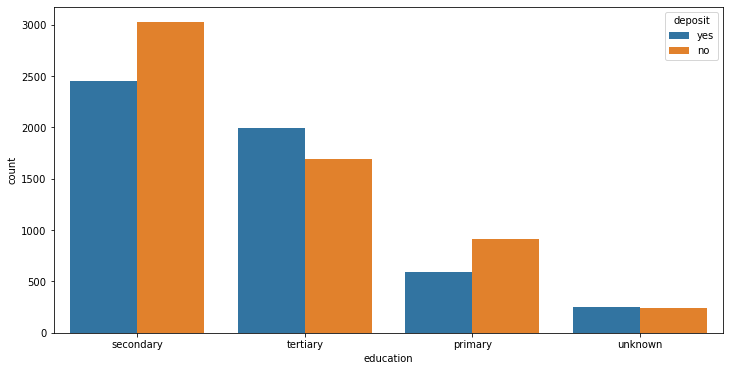

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='education', data=df, hue='deposit')

# Data Prep

Em um primeiro momento, vamos revisitar novamente a base de dados.

In [13]:
# Revisitando a base de dados
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Para o treinamento adequado de um modelo de classificação, é preciso aplicar uma transformação nas colunas categóricas, a iniciar pela nossa variável `target`. Grande parte (se não todos) os modelos tradicionais de aprendizado de máquina exigem que as entradas sejam numéricas e, dessa forma, é preciso aplicar um procedimento de [encoding](https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example) nas variáveis categóricas.

Primeiro, vamos transformar a variável target e codificar 1 para entradas `yes` e 0 caso contrário.

In [14]:
# Criando coluna de target
df['target'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
df.drop('deposit', axis=1, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


Na sequência, um passo importante para que um modelo possa definitivamente ser treinado, é a separação dos dados em `treino` e `teste`. Em resumo, é preciso que um algoritmo aprenda a mapear uma função x -> y com uma base de treinamento e, ao final, validar com uma base de teste não utilizada durante este mapeamento.

Links úteis:

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

https://pt.stackoverflow.com/questions/428437/como-funciona-o-m%C3%A9todo-train-test-split-no-scikit-learn

In [15]:
# Separando dados em treino e teste
from sklearn.model_selection import train_test_split

df = df.drop('duration', axis=1)
X = df.drop('target', axis=1)
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de X_test: {X_test.shape}')

Dimensões de X_train: (8929, 15)
Dimensões de X_test: (2233, 15)


Separados os dados, vamos deixar de lado o conjunto X_test e trabalhar em cima do conjunto X_train para as devidas transformações na base. A primeira delas visa aplicar o processo de encoding nas variáveis categóricas. Vamos ver como funciona o método `get_dummies()` do Pandas:

In [16]:
# Demonstração do get_dummies()
pd.get_dummies(X_train['marital'], prefix='marital').head()

,marital_divorced,marital_married,marital_single
3955,0,0,1
11150,0,1,0
5173,1,0,0
3017,0,1,0
2910,0,1,0


Referência: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

In [17]:
# Transformando uma coluna de exemplo
X_copy = X_train.copy()
marital_dummies = pd.get_dummies(X_copy['marital'], prefix='marital')
X_copy = X_copy.merge(marital_dummies, how='left', left_index=True, right_index=True)
X_copy.drop('marital', axis=1, inplace=True)

# Visualizando resultado
X_copy.head()

,age,job,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,marital_divorced,marital_married,marital_single
3955,28,student,tertiary,no,5741,no,no,cellular,10,sep,5,200,3,failure,0,0,1
11150,34,management,secondary,no,355,no,no,cellular,21,aug,3,-1,0,unknown,0,1,0
5173,48,unemployed,secondary,no,201,no,no,cellular,10,nov,1,91,1,success,1,0,0
3017,53,entrepreneur,tertiary,no,1961,no,no,cellular,15,dec,1,-1,0,unknown,0,1,0
2910,53,management,tertiary,no,1624,no,no,cellular,11,nov,3,97,7,success,0,1,0


Referência: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

Bom, uma vez realizado o teste com uma única coluna do DataFrame, podemos criar um laço de repetição capaz de navegar entre todas as colunas categóricas da nossa base e aplicar esse mesmo procedimento, codificando assim todas as variáveis elegíveis de uma única vez.

In [18]:
categoric_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                  'contact', 'month', 'poutcome']
X_train_prep = X_train.copy()
for col in categoric_cols:
    col_dummies = pd.get_dummies(X_train_prep[col], prefix=col)
    X_train_prep = X_train_prep.merge(col_dummies, how='left', left_index=True, right_index=True)
    X_train_prep.drop(col, axis=1, inplace=True)

In [19]:
# Visualizando base
X_train_prep.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3955,28,5741,10,5,200,3,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
11150,34,355,21,3,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5173,48,201,10,1,91,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3017,53,1961,15,1,-1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2910,53,1624,11,3,97,7,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
# Novas features do modelo
X_train_prep.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

# Treinando um Modelo

Neste contexto, vamos utilizar o modelo de Árvore de Decisão para compreender quais são as principais features do modelo que podem ser usadas para definir a probabilidade de um cliente aceitar um produto oferecido.

Referência: https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb

Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [24]:
# Importando e instanciando modelo
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_prep, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Métricas de Avaliação

### Matriz de Confusão

- **True Positive (TP)**: Mostra que o elemento da classe Positiva foi \emph{corretamente} predito pelo modelo como sendo da classe Positiva. (exemplo: transação fraudulenta marcada como fraudulenta)
    
    
- **False Positives (FP)**: Mostra que o elemento da classe Negativa foi \emph{incorretamente} predito pelo modelo como sendo da classe Positiva. (exemplo: transação normal marcada como fraudulenta - \emph{Erro Tipo I})
    
    
- **False Negatives (FN)**: Mostra que o elemento da classe Positiva foi \emph{incorretamente} predito pelo modelo como sendo da classe Negativa. (exemplo: transação fraudulenta marcada como normal - \emph{Erro Tipo II})
    
    
- **True Negatives (TN)**: Mostra que o elemento da classe Negativa foi \emph{corretamente} predito pelo modelo como sendo da classe Negativa. (exemplo: transação normal marcada como normal)

A Matriz de Confusão é usada para descrever a performance de modelos de classificação em um conjunto onde o target é conhecido. A Matriz, por si só, não pode ser considerada uma métrica de avaliação, entretanto grande parte das demais métricas são baseadas na própria matriz e nos elementos que a compõe.

### Acurácia

A acurácia de um modelo pode ser entendida como a quantidade de predições corretas (de ambas as classes) em relação ao total de elementos classificados. Em termos técnicos, podemos definir a acurácia como:

$$\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}$$

Nem sempre um modelo com uma alta acurácia é um bom modelo. É interessante utilizar essa métrica quando o conjunto de dados possui classes balanceadas. Exemplos clássicos onde medir a performance do modelo através da acurácia não é recomendada:

* Modelo para identificação de transações fraudulentas
* Modelo para diagnóstico de câncer
* Qualquer modelo com a classe target \textit{desbalanceada}

Isto pois, se o problema de negócio envolver dados com uma quantidade muito baixa da classe positiva, qualquer modelo que classifique toda e qualquer instância como sendo da classe negativa, terá uma acurácia muito alta.

Por exemplo, se o problema a ser resolvido envolve a identificação de transações fraudulentas em cartões e, no conjunto de dados, apenas 5\% das instâncias são fraudulentas, o modelo que classificar toda e qualquer transação como não-fraudulenta, terá 95\% de acurácia. Parece um bom número, mas nenhuma transação fraudulenta foi identificada. Existem métricas que lidam com esse tipo de problema e serão vistas logo a seguir. 

### Precision

A métrica Precision responde a seguinte pergunta: "De todas as predições da classe positiva, quantas realmente são da classe positiva?". Intuitivamente, significa dizer o quão preciso e acertivo é o modelo treinado, visto que a métrica mede os verdadeiros acertos da classe positiva em todas as classificações positivas do modelo. Talvez o entendimento será maior a partir da fórmula:

$$\text{Precision}=\frac{TP}{TP+FP}$$

Retomando o exemplo do problema de identificação de fraudes, significa dizer que a métrica mede a relação entre transações fraudulentas classificadas corretamente (TP) e todas as transações fraudulentas classificadas (TP+FP).

Aumentar Precision significa diminuir o número de _Falsos Positivos (FP)_ (ex: transações normais erroneamente classificadas como fraudes). Um exemplo onde os Falsos Positivos podem ter mais importância que os Falsos Negativos é na classificação de Spams. Aumentar a precisão do modelo, significa minimizar e-mails normais classificados como Spam, o que pode ser mais vantajoso do que deixar alguns Spams passarem batido.

Porém, pode-se sempre querer um modelo preciso? No exemplo de identificação de fraude, seria mais vantajoso minimizar os Falsos Positivos (transações normais classificadas como fraude) ou os Falsos Negativos (fraudes classificadas como transações normais)? É melhor bloquear o cartão de clientes fiéis e pegar todos os fraudadores? Ou não bloquear o cartão de clientes fiéis a troco de deixar alguns fraudadores?

### Recall

Como introduzido no tópico anterior, Recall (ou _Sensitivy_, ou _True Positives Rate_) responde a pergunta: "De todas as instâncias pertencentes a classe positiva, quantas o modelo classificou corretamente?". Comparando com Precision, aqui tem-se uma significância maior na Classe Atual das instâncias e não na Classe Predita.

$$\text{Recall}=\frac{TP}{TP+FN}$$

Retomando o exemplo do problema de identificação de fraudes, temos o Recall como medida da relação entre transações fraudulentas classificadas corretamente (TP) e todas as transações que deveriam ser classificadas como fraudulentas (TP+FN).

Aumentar o Recall significa diminuir o número de _Falsos Negativos (FN)_ (ex: fraudes erroneamente classificadas como transações normais).

A mesma questão feita anteriormente é: o problema de negócio irá definir se é mais vantajoso minimizar os Falsos Positivos (aumentar Precision) ou os Falsos Negativos (aumentar Recall). O fato é que nunca será possível maximizar os dois simnultaneamente. Existe uma troca entre Precision e Recall onde aumentar um significa diminuir o outro.

### F1-Score

Precision e Recall são duas métricas extremamente importantes para qualquer modelo de classificação. A relação entre ambas deve ser explorada ao limite (e isso será detalhado em um dos próximos tópicos). Entretanto, nem sempre será preciso carregar ambas as métricas e utiliza-las a todo momento. A F1-Score é uma métrica desenvolvida justamente para contemplar Precision e Recall em um único número, através de uma _média harmônica_.

$$\text{f1}=2\times\frac{Precision*Recall}{Precision+Recall}$$

O score F1 pode ser utilizado como objetivo de minimização, visto que penaliza modelos onde a diferença entre Precision e Recall é muito ampla (um muito bom e o outro muito ruim), retornando bons índices caso os dois sejam próximos e em níveis razoáveis.